In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
%matplotlib inline

plt.rcParams["figure.figsize"] = 10,10

In [0]:
# Create dataset

def generate_dataset():
  
    theta = np.linspace(0, 20, 1000)
    theta_val = np.linspace(0, 20, 250)
    
    x1 = (theta/4) * np.cos(theta)
    y1 = (theta/4) * np.sin(theta)
    
    x1_val = (theta_val/4) * np.cos(theta_val)
    y1_val = (theta_val/4) * np.sin(theta_val)
    
    x2 = (theta/4 + 0.8) * np.cos(theta)
    y2 = (theta/4 + 0.8) * np.sin(theta)
    
    x2_val = (theta_val/4 + 0.8) * np.cos(theta_val)
    y2_val = (theta_val/4 + 0.8) * np.sin(theta_val)
    
    dt1 = np.c_[x1, y1, np.zeros(1000)]
    dt2 = np.c_[x2, y2, np.ones(1000)]
    
    dt1_val = np.c_[x1_val, y1_val, np.zeros(250)]
    dt2_val = np.c_[x2_val, y2_val, np.ones(250)]
    
    return np.r_[dt1, dt2], np.r_[dt1_val, dt2_val]
    
    

In [0]:
dt, dt_val = generate_dataset()

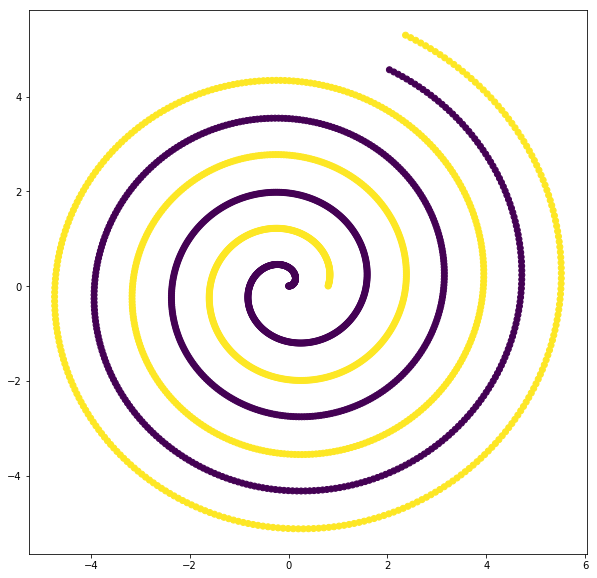

In [4]:
plt.scatter(dt[:,0], dt[:,1], c=dt[:,2])

In [5]:
from keras import models, layers

Using TensorFlow backend.


In [6]:
mlp = models.Sequential()

mlp.add(layers.Dense(64, activation='relu', input_shape=(dt.shape[1]-1, )))
mlp.add(layers.Dense(32, activation='relu'))
mlp.add(layers.Dense(16, activation='relu'))
mlp.add(layers.Dense(1, activation='sigmoid'))

mlp.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
batch = 16
ep = 150

x_train = dt[:,0:2]
y_train = dt[:,2]

x_val = dt_val[:,0:2]
y_val = dt_val[:,2]

In [9]:
#hist = mlp.fit(x_train, y_train, epochs=ep, batch_size=batch, shuffle=True, validation_data=(x_val, y_val))
mlp = models.load_model('mlp_mode.h5')

Instructions for updating:
Use tf.cast instead.


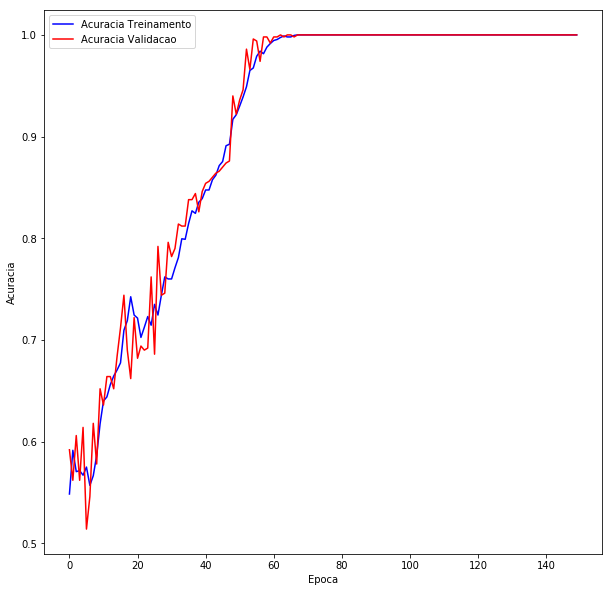

In [0]:
acc = hist.history['acc']
acc_val = hist.history['val_acc']

plt.plot(range(len(acc)), acc, 'b', label='Acuracia Treinamento')
plt.plot(range(len(acc)), acc_val, 'r', label='Acuracia Validacao')
plt.xlabel('Epoca')
plt.ylabel('Acuracia')
plt.legend()
plt.savefig('Q2_acc.png')

In [0]:
mlp.save('mlp_mode.h5')

In [0]:
x = np.linspace(-6, 6, 100)

XX, YY = np.meshgrid(x, x)

XX_pred, YY_pred = XX.ravel(), YY.ravel()

grid_train = np.c_[XX_pred, YY_pred] 

In [0]:
pred = mlp.predict(grid_train)

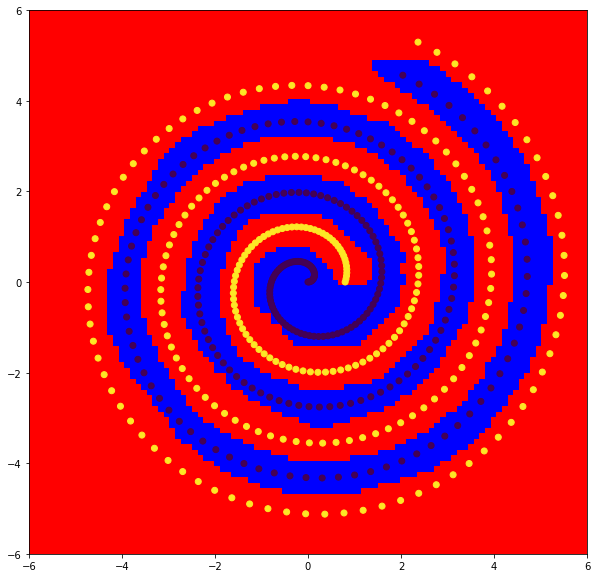

In [12]:
plt.pcolor(XX, YY, pred.round().reshape(len(XX), -1), cmap='bwr')
plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
plt.savefig('grid_pred.png', dpi=300)

In [0]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #print(y_true.shape)
    #print(y_pred.shape)
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontweight='bold', fontsize=15)
    
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Label predito', fontsize=15)
    ax.set_ylabel('Label verdadeiro', fontsize=15)
    ax.set_title(title, fontsize=15)
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[250   0]
 [  0 250]]


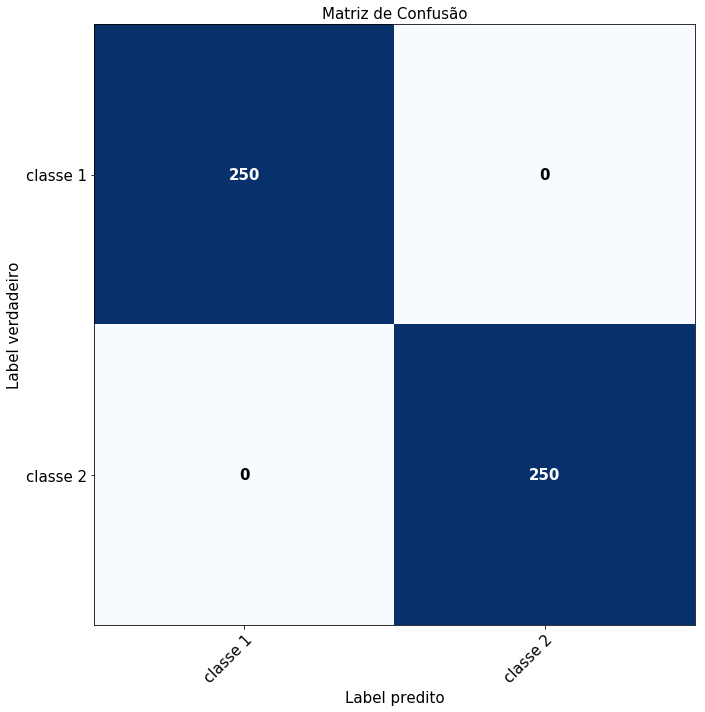

In [14]:
classes = np.array(['classe 1', 'classe 2'])

pred_val_mlp = mlp.predict(x_val).round()


plot_confusion_matrix(y_val, pred_val_mlp, classes=classes, title='Matriz de Confusão MLP')
plt.savefig("fig_2_confMatrix_mlp.png", dpi=320)
plt.show()

In [15]:
### Training SVM classifier

from sklearn.svm import SVC

svm = SVC(C=1, gamma=3)

svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

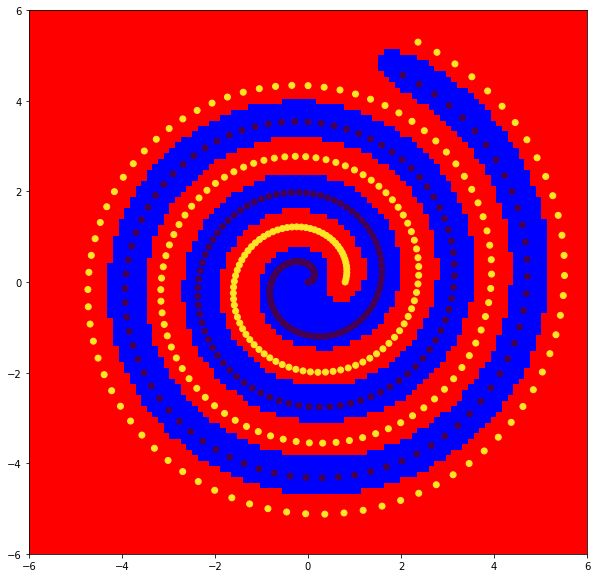

In [16]:
pred_grid_svm = svm.predict(grid_train)

plt.pcolor(XX, YY, pred_grid_svm.round().reshape(len(XX), -1), cmap='bwr')
plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
plt.savefig('grid_pred_svm.png', dpi=300)

Confusion matrix, without normalization
[[250   0]
 [  0 250]]


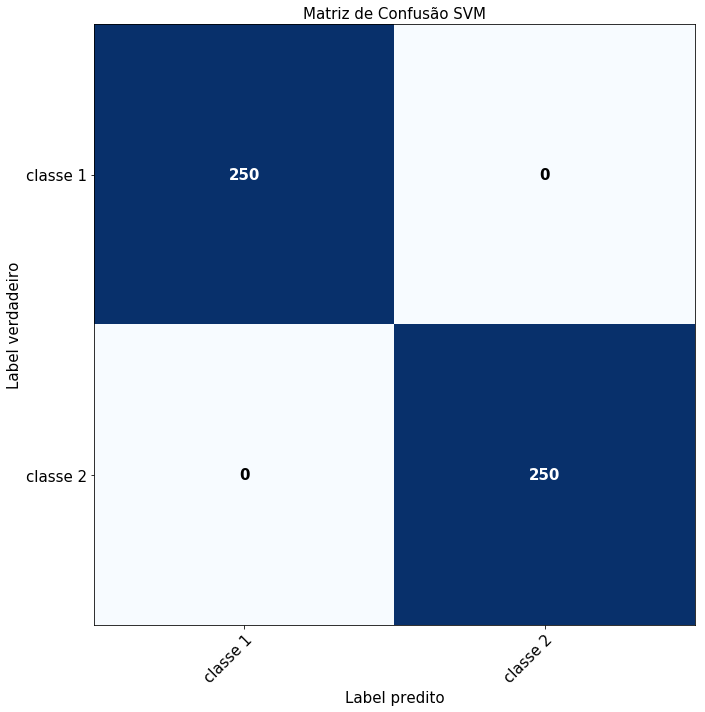

In [19]:
pred_val_svm = svm.predict(x_val).round()


plot_confusion_matrix(y_val, pred_val_svm, classes=classes, title='Matriz de Confusão SVM')
plt.savefig("fig_2_confMatrix_svm.png", dpi=320)
plt.show()

### RBF

In [0]:
import RBFNet as rbf

In [21]:
number_of_neurons = 250
n_epochs = 5        

rbfnet = rbf.rbf_net(number_of_neurons, epochs=n_epochs)
rbfnet.fit(x_train, y_train, val_data=(x_val, y_val))


#pred = rbfnet.predict(val_x_train)


epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4


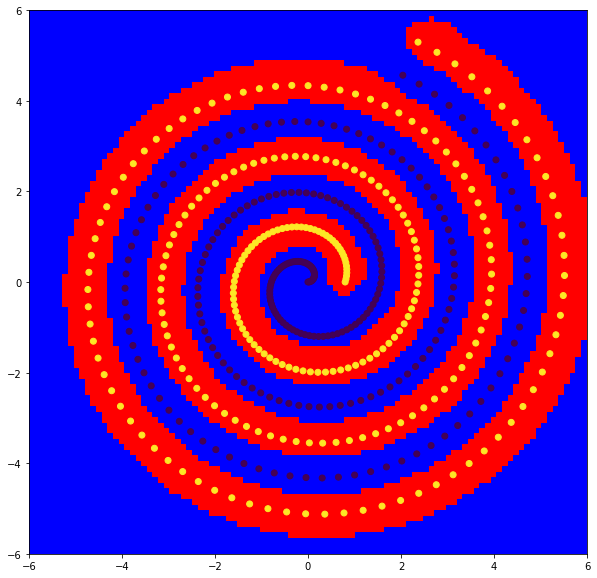

In [22]:
pred_grid_rbf = rbfnet.predict(grid_train)

plt.pcolor(XX, YY, pred_grid_rbf.round().reshape(len(XX), -1), cmap='bwr')
plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
plt.savefig('grid_pred_rbf.png', dpi=300)

Confusion matrix, without normalization
[[250   0]
 [  0 250]]


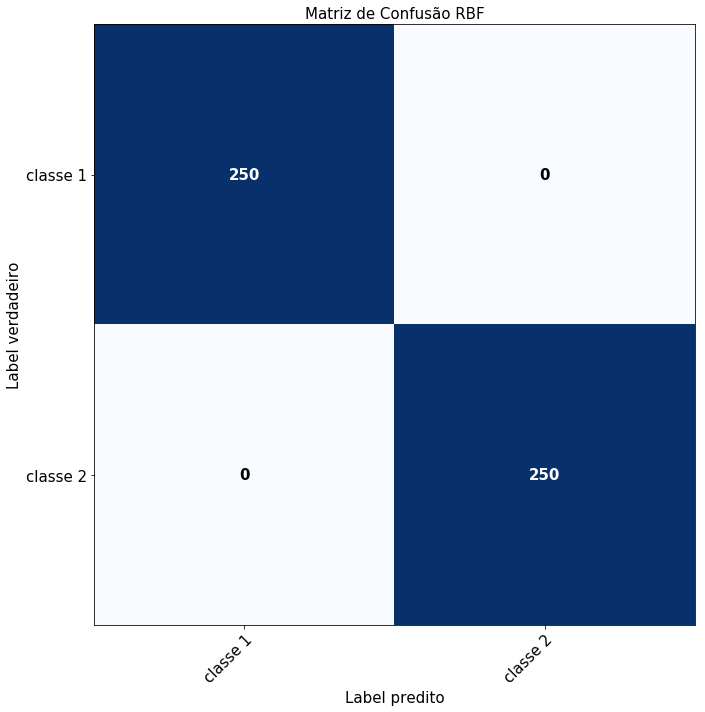

In [23]:
pred_val_rbf = rbfnet.predict(x_val).round()


plot_confusion_matrix(y_val, pred_val_rbf, classes=classes, title='Matriz de Confusão RBF')
plt.savefig("fig_2_confMatrix_RBF.png", dpi=320)
plt.show()